[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nmickevicius/MCW_BIOP_03-238_MRI/02_fourier_transforms/blob/lecture02/complex_numbers.ipynb)

# Complex numbers — what the Argand tool is showing

## Notation & the Argand plane

A complex number is

$$
z=a+bi,\qquad a=\Re(z),\; b=\Im(z),\; i^2=-1 .
$$

We plot $z$ as the point $(a,b)$ (or arrow from the origin) on the **Argand plane**
(horizontal = real axis, vertical = imaginary axis).

## Modulus & argument (polar form)

$$
|z|=r=\sqrt{a^2+b^2},\qquad
\arg z=\theta=\operatorname{atan2}(b,a)\in(-\pi,\pi].
$$

Polar (trigonometric) form:

$$
z=r(\cos\theta+i\sin\theta)=r\,e^{i\theta}.
$$

On the **unit circle** $r=1$ so $z=e^{i\theta}$ is a pure rotation by $\theta$.

> Angle wrap: adding any multiple of $2\pi$ (or $360^\circ$) gives the same direction:
> $\theta \sim \theta+2\pi k$.

## Addition & subtraction (vector picture)

$$
u=z+w\quad\text{or}\quad u=z-w.
$$

Geometrically this is **vector (parallelogram) addition**. In coordinates,

$$
(a+bi)\pm(c+di)=(a\pm c)+i(b\pm d).
$$

In the plot, the dashed guides show head-to-tail construction; subtraction uses the reversed vector $-w$.

## Multiplication = scale + rotate

Rectangular algebra:

$$
(a+bi)(c+di)=(ac-bd)+i(ad+bc).
$$

Polar rule:

$$
z=r_ze^{i\theta_z},\; w=r_we^{i\theta_w}
\;\Longrightarrow\;
zw=(r_zr_w)e^{i(\theta_z+\theta_w)}.
$$

So $|zw|=|z||w|$ (scaling) and $\arg(zw)=\arg z+\arg w$ (rotation).

Special cases:

* $e^{i\phi}\cdot z$ rotates $z$ by $+\phi$ without changing length.
* $i=e^{i\pi/2}$ rotates by $90^\circ$.
* Real $k>0$ just scales: $kz$ multiplies all lengths by $k$.

## Division = un-scale + un-rotate

$$
\frac{z}{w}=\frac{z\overline{w}}{|w|^2}
\quad(\text{undefined if } w=0),
$$

so in polar form

$$
\left|\frac{z}{w}\right|=\frac{|z|}{|w|},\qquad
\arg\!\left(\frac{z}{w}\right)=\arg z-\arg w.
$$

## Conjugation = reflection across the real axis

$$
\overline{z}=a-bi=r\,e^{-i\theta}.
$$

Properties used by the tool and handy in proofs:

$$
\overline{\overline{z}}=z,\quad
z\overline{z}=|z|^2,\quad
\overline{zw}=\overline{z}\,\overline{w},\quad
\overline{z+w}=\overline{z}+\overline{w}.
$$

## Euler’s formula & de Moivre

Euler:

$$
e^{i\theta}=\cos\theta+i\sin\theta.
$$

De Moivre (powers/roots in polar form):

$$
\big(r e^{i\theta}\big)^{n}=r^{n}e^{in\theta},\qquad
\sqrt[n]{\,r e^{i\theta}}=\;r^{1/n}e^{i(\theta+2\pi k)/n},\;k=0,\dots,n-1.
$$

On the unit circle, the $n$-th roots of unity form a regular $n$-gon.

## Rectangular ↔ polar (at a glance)

$$
\begin{aligned}
r&=\sqrt{a^2+b^2}, & \theta&=\operatorname{atan2}(b,a),\\
a&=r\cos\theta, & b&=r\sin\theta.
\end{aligned}
$$

## Rotation–scaling matrix viewpoint

Multiplying by $z=a+bi$ is the same as applying

$$
\begin{bmatrix}a&-b\\[2pt] b&\;\;a\end{bmatrix}
$$

to the vector $\begin{bmatrix}x\\y\end{bmatrix}$ (which corresponds to $x+iy$).
When $a^2+b^2=1$ this matrix is a pure rotation by $\theta=\arg z$.

## Quick identities the tool illustrates

* $|z+w|\le |z|+|w|$ (triangle inequality).
* $|zw|=|z||w|$, $\arg(zw)=\arg z+\arg w$.
* $\left|\dfrac{z}{w}\right|=\dfrac{|z|}{|w|}$, $\arg\!\left(\dfrac{z}{w}\right)=\arg z-\arg w$.
* $\arg(\overline{z})=-\arg(z)$.
* $\Re(z)=\dfrac{z+\overline{z}}{2},\quad \Im(z)=\dfrac{z-\overline{z}}{2i}$.

## Tiny worked examples (match the defaults)

1. $z=1+i,\; w=1$.

$$
z\times w=(1+i)\cdot1=1+i,\quad
|z|=\sqrt2,\; \arg z=45^\circ.
$$

Multiplying by $w=1=e^{i\cdot0}$ leaves $z$ unchanged (scale $1$, rotate $0^\circ$).

2. $z=1+i,\; w=i$.

$$
zw=(1+i)i=i-1=(-1)+i,\quad
|zw|=|z||w|=\sqrt2,\;\arg(zw)=45^\circ+90^\circ=135^\circ.
$$

Geometrically: rotate $z$ by $90^\circ$.


In [3]:
# Complex Numbers Explorer (inline + ipywidgets)
# ------------------------------------------------
# This version is designed for VS Code/Jupyter with *%matplotlib inline*.
# It uses `ipywidgets.interact` to re-render a static Matplotlib plot whenever
# a control changes—so it works without the interactive Matplotlib backend.
#
# Required (Python-side): numpy, matplotlib, ipywidgets, IPython
#
# If ipywidgets isn't installed in *this* environment, the cell will still show
# a static demo and print a short tip. In your notebook, ensure ipywidgets is installed.

# %% Imports requested
%matplotlib inline
import numpy as np
try:
    from ipywidgets import interact, interactive, FloatSlider, IntSlider, Checkbox
except Exception as e:
    interact = None  # graceful fallback below
from IPython.display import clear_output, display, HTML

# Additional import needed for plotting
import matplotlib.pyplot as plt

# ---------- Helpers ----------

def _r_theta(z):
    return np.abs(z), np.angle(z)

def _deg(theta):
    return f"{np.degrees(theta):.1f}°"

def _fmt(x):
    x = 0.0 if abs(x) < 1e-12 else x
    return f"{x:.3g}"

def _cmplx_str(name, z):
    a, b = z.real, z.imag
    r, th = _r_theta(z)
    ab = f"{_fmt(a)} {'+' if b>=0 else '-'} {_fmt(abs(b))}i"
    polar = f"{_fmt(r)} · e^{ { 'i' } }{_fmt(np.degrees(th))}°"
    return f"<b>{name}</b> = {ab} &nbsp; = &nbsp; {polar}"

def _axis_limits(points, pad=0.7, minimum=3):
    xs = [p.real for p in points] or [0]
    ys = [p.imag for p in points] or [0]
    m = max([abs(x) for x in xs] + [abs(y) for y in ys] + [1])
    m = max(m + pad, minimum)
    return (-m, m, -m, m)

def _explain(op, z, w, u):
    rz, thz = _r_theta(z)
    rw, thw = _r_theta(w)
    if op == "z + w":
        return "Addition is vector (parallelogram) addition in the Argand plane."
    if op == "z - w":
        return "Subtraction is head-to-tail addition with the reversed vector −w."
    if op == "z * w":
        return (f"Multiplication = scale & rotate: |u|=|z||w|={_fmt(rz)}·{_fmt(rw)}={_fmt(rz*rw)}, "
                f"arg(u)=arg(z)+arg(w)={_deg(thz)}+{_deg(thw)}={_deg(thz+thw)}.")
    if op == "z / w":
        if w == 0:
            return "Division by zero is undefined."
        return (f"Division = un-scale & un-rotate: |u|=|z|/|w|={_fmt(rz)}/{_fmt(rw)}={_fmt(rz/rw)}, "
                f"arg(u)=arg(z)-arg(w)={_deg(thz)}−{_deg(thw)}={_deg(thz-thw)}.")
    if op == "conj(z)":
        return "Conjugation reflects across the real axis: overline(z)=a−bi."
    if op == "conj(w)":
        return "Conjugation reflects across the real axis: overline(w)=c−di."
    return ""

# ---------- Core drawing ----------

def _draw(z, w, u, op, unit_circle):
    plt.figure(figsize=(5,5))
    ax = plt.gca()
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.grid(True, linestyle=":")
    ax.set_xlabel("Re")
    ax.set_ylabel("Im")

    pts = [z, w] + ([u] if u is not None else [])
    xmin, xmax, ymin, ymax = _axis_limits(pts)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)

    if unit_circle:
        t = np.linspace(0, 2*np.pi, 400)
        ax.plot(np.cos(t), np.sin(t), linewidth=1)

    def arrow_to(c, label):
        ax.quiver(0, 0, c.real, c.imag, angles='xy', scale_units='xy', scale=1)
        ax.annotate(label, xy=(c.real, c.imag), xytext=(5, 5), textcoords="offset points")

    arrow_to(z, "z")
    arrow_to(w, "w")
    if u is not None:
        arrow_to(u, "u")

    if op in ("z + w", "z - w"):
        tgt = u if u is not None else (z + w if op == "z + w" else z - w)
        ax.plot([z.real, tgt.real], [z.imag, tgt.imag], linestyle="--")
        ax.plot([w.real, tgt.real], [w.imag, tgt.imag], linestyle="--")

    ax.set_title("Argand Diagram")
    plt.tight_layout()
    plt.show()

# ---------- Interactive callback ----------

def explore(z_re=1.0, z_im=1.0, w_re=1.0, w_im=0.0, operation="z * w", unit_circle=True):
    """
    Re-renders a static plot on each change (works with %matplotlib inline).
    """
    clear_output(wait=True)

    z = complex(z_re, z_im)
    w = complex(w_re, w_im)

    u = None
    if operation == "z + w":
        u = z + w
    elif operation == "z - w":
        u = z - w
    elif operation == "z * w":
        u = z * w
    elif operation == "z / w":
        u = None if w == 0 else z / w
    elif operation == "conj(z)":
        u = np.conj(z)
    elif operation == "conj(w)":
        u = np.conj(w)

    _draw(z, w, u, operation, unit_circle)

    # Concise textual readout (HTML; renders crisp in VS Code & Jupyter)
    lines = [
        _cmplx_str("z", z),
        _cmplx_str("w", w),
    ]
    if u is not None:
        lines.append(_cmplx_str("u", u))
    lines.append(_explain(operation, z, w, u))

    html = "<div style='font-family: ui-sans-serif, system-ui; line-height:1.4;'>" + "<br/>".join(lines) + "</div>"
    display(HTML(html))

# ---------- Build UI ----------

if interact is None:
    # Fallback if ipywidgets is not installed in this kernel (still shows a static example)
    print("ipywidgets is not available in this kernel. Showing a static example.")
    explore()  # default values
else:
    z_re = FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Re(z)')
    z_im = FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Im(z)')
    w_re = FloatSlider(value=1.0, min=-5.0, max=5.0, step=0.1, description='Re(w)')
    w_im = FloatSlider(value=0.0, min=-5.0, max=5.0, step=0.1, description='Im(w)')
    unit = Checkbox(value=True, description='Show unit circle')

    interact(
        explore,
        z_re=z_re,
        z_im=z_im,
        w_re=w_re,
        w_im=w_im,
        operation=["z * w", "z + w", "z - w", "z / w", "conj(z)", "conj(w)"],
        unit_circle=unit
    )


interactive(children=(FloatSlider(value=1.0, description='Re(z)', max=5.0, min=-5.0), FloatSlider(value=1.0, d…

In [1]:
# %matplotlib widget
# import matplotlib
# print("Matplotlib backend:", matplotlib.get_backend())

!pip3 install -U "ipywidgets>=8,<9" "ipympl>=0.9" "matplotlib>=3.6" "traitlets>=5.5"

# Use the interactive, in-notebook backend
%matplotlib widget

import ipywidgets, ipympl, matplotlib, sys
print("ipywidgets:", ipywidgets.__version__)
print("ipympl:", getattr(ipympl, "__version__", "missing"))
print("matplotlib:", matplotlib.__version__)
print("python:", sys.version)

You should consider upgrading via the '/Users/nmickevicius/dev/MCW_BIOP_03-238_MRI/venv/bin/python3 -m pip install --upgrade pip' command.
ipywidgets: 8.1.7
ipympl: 0.9.7
matplotlib: 3.10.5
python: 3.10.0 (v3.10.0:b494f5935c, Oct  4 2021, 14:59:19) [Clang 12.0.5 (clang-1205.0.22.11)]


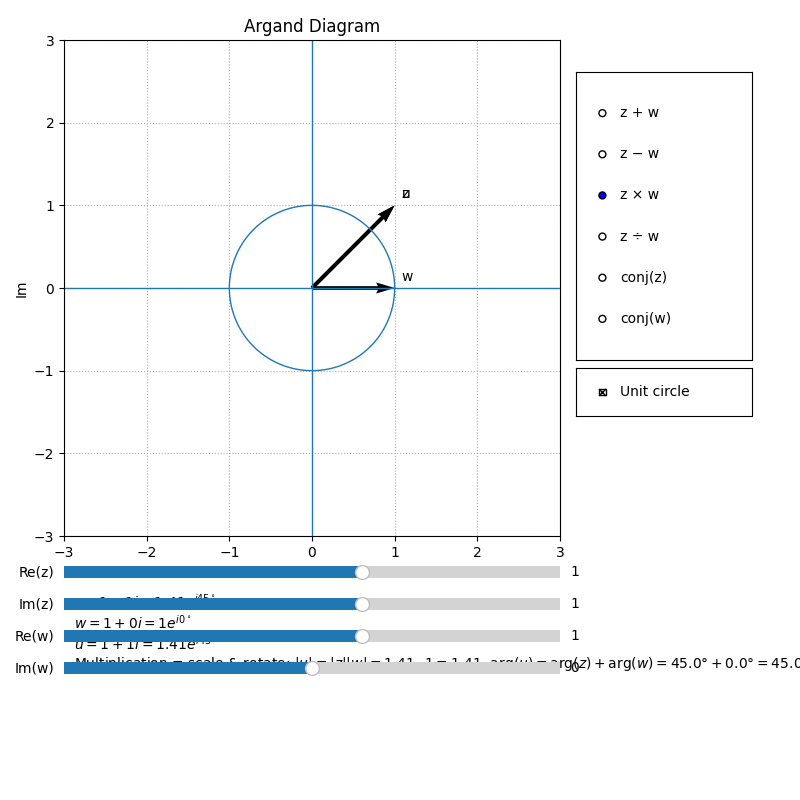

In [2]:
# Interactive Complex Numbers Explorer (Matplotlib-only, Jupyter-ready)
# --------------------------------------------------------------------
# This cell builds a compact interactive tool with pure matplotlib widgets
# (no ipywidgets needed). It shows how complex numbers behave:
# - Sliders for z and w
# - Radio buttons to pick the operation (add/subtract/multiply/divide/conjugate)
# - A checkbox to show/hide the unit circle
# - Live Argand diagram + concise math readout
#
# Notes:
# - Uses matplotlib only (no seaborn, no explicit colors).
# - One figure is used; avoid creating additional plots.

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, RadioButtons, CheckButtons

# ---------- Math helpers ----------

def r_theta(z):
    return np.abs(z), np.angle(z)

def deg(theta):
    return f"{np.degrees(theta):.1f}°"

def fmt(x):
    x = 0.0 if abs(x) < 1e-12 else x
    return f"{x:.3g}"

def cmplx_tex(label, z):
    a, b = z.real, z.imag
    r, th = r_theta(z)
    ab = f"{fmt(a)} {'+' if b>=0 else '-'} {fmt(abs(b))}i"
    polar = f"{fmt(r)} e^{{i {fmt(np.degrees(th))}^\\circ}}"
    return rf"{label} = {ab} = {polar}"

def result_explainer(op, z, w, u):
    rz, thz = r_theta(z)
    rw, thw = r_theta(w)
    if u is not None:
        ru, thu = r_theta(u)
    if op == "z + w":
        return r"Addition = vector (parallelogram) sum: $\vec z + \vec w = \vec u$."
    if op == "z − w":
        return r"Subtraction = head-to-tail with reversed vector: $\vec z - \vec w = \vec u$."
    if op == "z × w":
        return (r"Multiplication = scale & rotate: "
                rf"$|u|=|z||w|={rz:.3g}\cdot{rw:.3g}={rz*rw:.3g}$, "
                rf"$\arg(u)=\arg(z)+\arg(w)={deg(thz)}+{deg(thw)}={deg(thz+thw)}$.")
    if op == "z ÷ w":
        if w == 0:
            return r"Division by zero is undefined."
        return (r"Division = un-scale & un-rotate: "
                rf"$|u|=\frac{{|z|}}{{|w|}}=\frac{{{rz:.3g}}}{{{rw:.3g}}}={rz/rw:.3g}$, "
                rf"$\arg(u)=\arg(z)-\arg(w)={deg(thz)}-{deg(thw)}={deg(thz-thw)}$.")
    if op == "conj(z)":
        return r"Conjugation reflects across the real axis: $\overline{z} = a - bi$."
    if op == "conj(w)":
        return r"Conjugation reflects across the real axis: $\overline{w} = c - di$."
    return ""

def axis_limits(points, padding=0.7, minimum=3):
    xs = [p.real for p in points]
    ys = [p.imag for p in points]
    m = max([abs(x) for x in xs] + [abs(y) for y in ys] + [1])
    m = max(m + padding, minimum)
    return (-m, m, -m, m)

# ---------- Figure & widgets ----------

fig = plt.figure(figsize=(8, 8))

# Main Argand axes
ax_plot = plt.axes([0.08, 0.33, 0.62, 0.62])
ax_plot.set_aspect('equal', adjustable='box')

# Text panel
ax_text = plt.axes([0.08, 0.05, 0.62, 0.22])
ax_text.axis('off')

# Sliders
ax_sz_re = plt.axes([0.08, 0.27, 0.62, 0.03])
ax_sz_im = plt.axes([0.08, 0.23, 0.62, 0.03])
ax_sw_re = plt.axes([0.08, 0.19, 0.62, 0.03])
ax_sw_im = plt.axes([0.08, 0.15, 0.62, 0.03])

s_z_re = Slider(ax_sz_re, 'Re(z)', -5.0, 5.0, valinit=1.0)
s_z_im = Slider(ax_sz_im, 'Im(z)', -5.0, 5.0, valinit=1.0)
s_w_re = Slider(ax_sw_re, 'Re(w)', -5.0, 5.0, valinit=1.0)
s_w_im = Slider(ax_sw_im, 'Im(w)', -5.0, 5.0, valinit=0.0)

# Operation chooser
ax_radio = plt.axes([0.72, 0.55, 0.22, 0.36])
radio = RadioButtons(ax_radio, ('z + w', 'z − w', 'z × w', 'z ÷ w', 'conj(z)', 'conj(w)'))
radio.set_active(2)  # default to multiply

# Unit circle checkbox
ax_check = plt.axes([0.72, 0.48, 0.22, 0.06])
check = CheckButtons(ax_check, ['Unit circle'], [True])

# ---------- Drawing ----------

def draw():
    ax_plot.clear()
    ax_plot.axhline(0, linewidth=1)
    ax_plot.axvline(0, linewidth=1)
    ax_plot.grid(True, linestyle=":")
    ax_plot.set_xlabel("Re")
    ax_plot.set_ylabel("Im")

    z = complex(s_z_re.val, s_z_im.val)
    w = complex(s_w_re.val, s_w_im.val)
    op = radio.value_selected

    # Compute result
    u = None
    if op == "z + w":
        u = z + w
    elif op == "z − w":
        u = z - w
    elif op == "z × w":
        u = z * w
    elif op == "z ÷ w":
        u = None if w == 0 else z / w
    elif op == "conj(z)":
        u = np.conj(z)
    elif op == "conj(w)":
        u = np.conj(w)

    # Limits
    pts = [z, w] + ([u] if u is not None else [])
    xmin, xmax, ymin, ymax = axis_limits(pts)
    ax_plot.set_xlim(xmin, xmax)
    ax_plot.set_ylim(ymin, ymax)

    # Optional unit circle
    if check.get_status()[0]:
        t = np.linspace(0, 2*np.pi, 400)
        ax_plot.plot(np.cos(t), np.sin(t), linewidth=1)

    # Vectors
    def arrow_to(c, label):
        ax_plot.quiver(0, 0, c.real, c.imag, angles='xy', scale_units='xy', scale=1)
        ax_plot.annotate(label, xy=(c.real, c.imag), xytext=(5, 5), textcoords="offset points")

    arrow_to(z, "z")
    arrow_to(w, "w")
    if u is not None:
        arrow_to(u, "u")

    # Addition/subtraction guides
    if op in ("z + w", "z − w"):
        target = u if u is not None else (z + w if op == "z + w" else z - w)
        ax_plot.plot([z.real, target.real], [z.imag, target.imag], linestyle="--")
        ax_plot.plot([w.real, target.real], [w.imag, target.imag], linestyle="--")

    ax_plot.set_title("Argand Diagram")
    fig.canvas.draw_idle()

    # Text area
    ax_text.clear()
    ax_text.axis('off')
    lines = [rf"${cmplx_tex('z', z)}$", rf"${cmplx_tex('w', w)}$"]
    if u is not None:
        lines.append(rf"${cmplx_tex('u', u)}$")
    expl = result_explainer(op, z, w, u)
    text = "\n".join(lines + [expl])
    ax_text.text(0.02, 0.95, text, va='top')

# Connect events
def on_change(val):
    draw()

s_z_re.on_changed(on_change)
s_z_im.on_changed(on_change)
s_w_re.on_changed(on_change)
s_w_im.on_changed(on_change)
radio.on_clicked(lambda _: draw())
check.on_clicked(lambda _: draw())

# Initial draw
draw()
plt.show()
